<a href="https://colab.research.google.com/github/sadrasa97/skin-cancer/blob/main/skin-cancer-saremi1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#import os
#import zipfile
#unzip_dataset
#local_zip='/content/drive/MyDrive/skincancer.zip'
#zip_ref=zipfile.ZipFile(local_zip,'r')
#zip_ref.extractall('/content/drive/MyDrive/skin')

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [4]:
from sklearn import model_selection
from glob import glob
import seaborn as sns
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import datasets

In [5]:
import tensorflow as tf

from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.layers import Dense, Dropout, Flatten

from tensorflow.keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras.utils import to_categorical

In [6]:
np.random.seed(1)

In [7]:
import cv2
import os
import glob
import gc

def lire_images(img_dir, xdim, ydim, nmax=5000) :
    label = 0
    label_names = []
    X = []
    y=[]
    for dirname in os.listdir(img_dir):
        print(dirname)
        label_names.append(dirname)
        data_path = os.path.join(img_dir + "/" + dirname,'*g')
        files = glob.glob(data_path)
        n=0
        for f1 in files:
            if n>nmax : break
            img = cv2.imread(f1) 
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
            img = cv2.resize(img, (xdim,ydim))
            X.append(np.array(img)) 
            y.append(label) 
            n=n+1
        print(n,' images lues')
        label = label+1
    X = np.array(X)
    y = np.array(y)
    gc.collect() 
    return X,y, label, label_names

In [8]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

In [9]:
X,y,Number_classes,Classes = lire_images("../content/drive/MyDrive/train", 244, 244, 1400)

benign
1401  images lues
malignant
1197  images lues


In [10]:
Number_classes

2

In [11]:
Classes

['benign', 'malignant']

In [12]:
X_test,y_test,_,__ = lire_images("../content/drive/MyDrive/test", 244, 244,400) 


benign
360  images lues
malignant
300  images lues


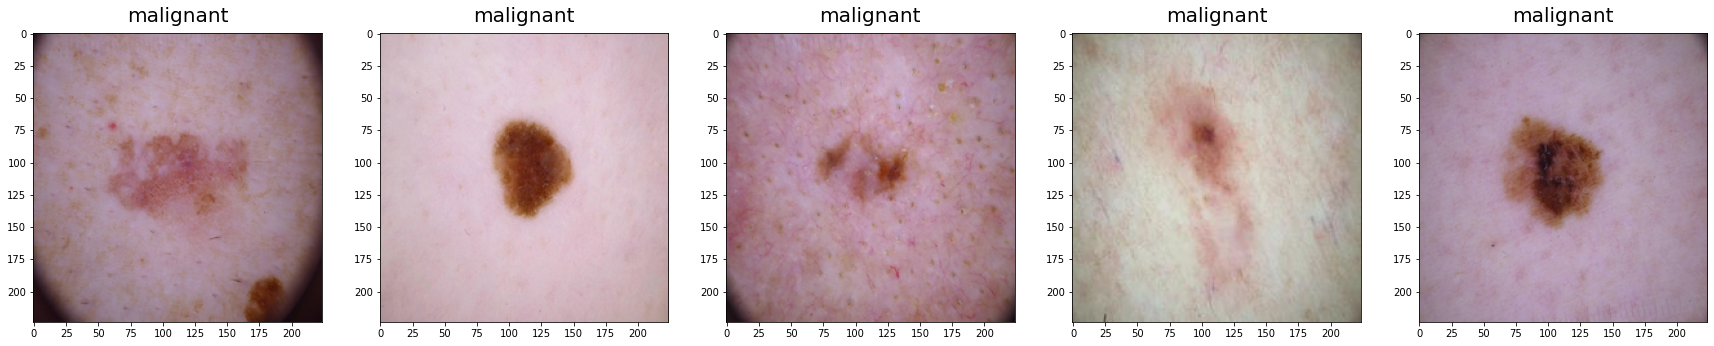

In [13]:
select_folder="malignant"
rows,columns = 1,5
trainxx='../content/drive/MyDrive/train'
display_folder=os.path.join(trainxx,select_folder)
total_images=rows*columns
fig=plt.figure(1, figsize=(30, 10))

for i,j in enumerate(os.listdir(display_folder)):      
    
    img = plt.imread(os.path.join(trainxx,select_folder,j))
    fig=plt.subplot(rows, columns, i+1)
    fig.set_title(select_folder, pad = 11, size=20)
    plt.imshow(img)
    
    if i==total_images-1:
        break

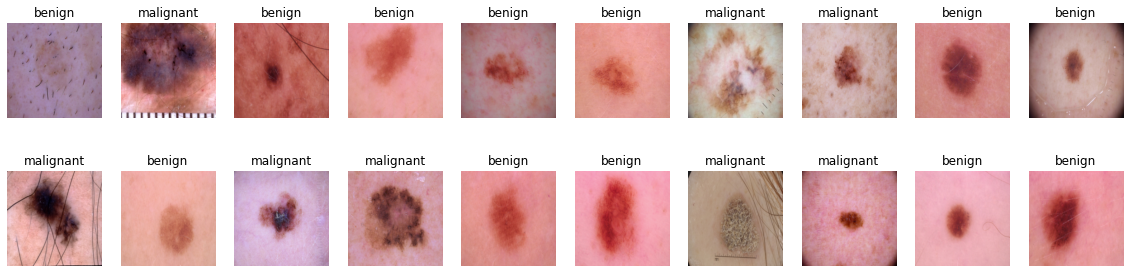

In [14]:
import random
plt.figure(figsize=(20,5))
for i in range(0,20) :
    plt.subplot(2,10,i+1)
    j = random.randint(0,len(X))
    plt.axis('off')
    plt.imshow(X[j])
    plt.title(Classes[y[j]])

In [15]:

X = X / 255
X_test = X_test / 255

In [16]:
ratio_val = 0.20
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=ratio_val,random_state=1,shuffle=True)

In [17]:
print(X.shape)
print(y.shape)
print(X_test.shape)
#print(X)
#img = plt.imread(os.path.join('/content/drive/MyDrive/train/benign/1089.jpg'))
#plt.imshow(img)

(2598, 244, 244, 3)
(2598,)
(660, 244, 244, 3)


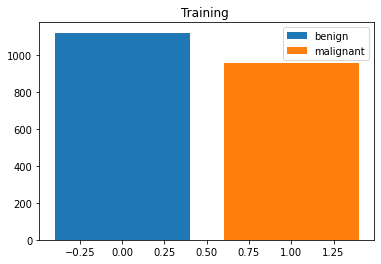

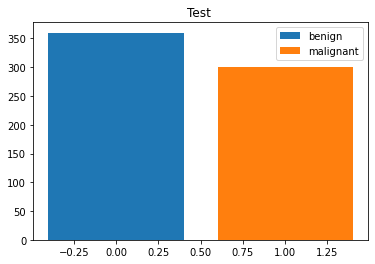

In [18]:
plt.bar(0, y_train[np.where(y_train == 0)].shape[0], label = 'benign')
plt.bar(1, y_train[np.where(y_train == 1)].shape[0], label = 'malignant')
plt.legend()
plt.title("Training ")
plt.show()

plt.bar(0, y_test[np.where(y_test == 0)].shape[0], label = 'benign')
plt.bar(1, y_test[np.where(y_test == 1)].shape[0], label = 'malignant')
plt.legend()
plt.title("Test ")
plt.show()

In [19]:
#train_datagen = ImageDataGenerator(
#      rescale=1./255,
#      rotation_range=20,
#      shear_range=0.2,
#      zoom_range=0.2,
#      width_shift_range=0.3,
#      height_shift_range=0.3,
#      horizontal_flip=True,
#      fill_mode='nearest')

#test_datagen = ImageDataGenerator(rescale = 1./255.)

#train_generator = train_datagen.flow_from_directory(
#                    "../content/drive/MyDrive/train",
#                    batch_size=128,
#                    class_mode='binary',
#                    shuffle=True,
#                    target_size=(244,244)
#)     

#test_generator =  test_datagen.flow_from_directory(
#                    "../content/drive/MyDrive/test",
#                    batch_size=128,
#                    class_mode='binary',
#                    shuffle=True,
#                    target_size=(244,244)
#)

In [20]:
Algorithm = []
Accuracy = []

In [21]:
model = SVC()
model.fit(X_train.reshape(X_train.shape[0],-1), y_train)

y_pred = model.predict(X_test.reshape(X_test.shape[0],-1))

Algorithm.append('Support vector machine ')
Accuracy.append(accuracy_score(y_test, y_pred)*100)

print(Algorithm[-1] +  ': ', Accuracy[-1])

Support vector machine :  82.57575757575758


In [22]:

model = Sequential()
model.add(Conv2D(32, (3, 3),padding='same', input_shape=(244, 244, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(36, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(Number_classes, activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-3), metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 244, 244, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 122, 122, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 122, 122, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 61, 61, 64)        0

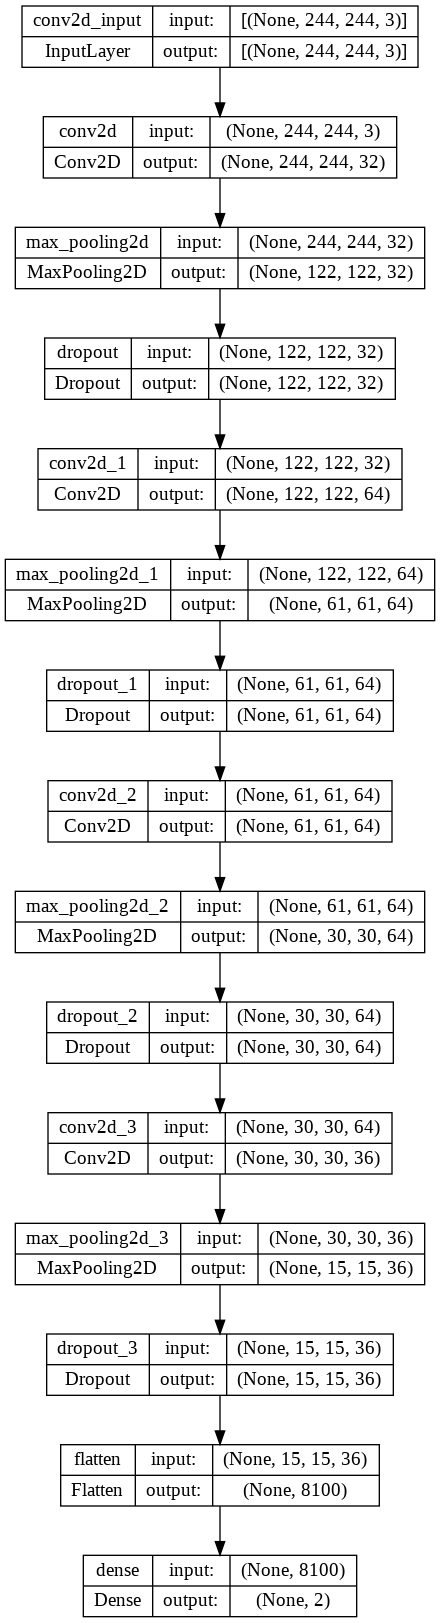

In [24]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True,
    show_layer_names=True,
)

In [25]:
train = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=35, verbose=1)
scores = model.evaluate(X_val, y_val, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Epoch 1/35
65/65 [==============================] - 256s 4s/step - loss: 0.6960 - accuracy: 0.5438 - val_loss: 0.6094 - val_accuracy: 0.7192
Epoch 2/35
65/65 [==============================] - 270s 4s/step - loss: 0.5076 - accuracy: 0.7464 - val_loss: 0.4891 - val_accuracy: 0.7827
Epoch 3/35
65/65 [==============================] - 267s 4s/step - loss: 0.4450 - accuracy: 0.7772 - val_loss: 0.4515 - val_accuracy: 0.7904
Epoch 4/35
65/65 [==============================] - 274s 4s/step - loss: 0.4076 - accuracy: 0.7974 - val_loss: 0.4124 - val_accuracy: 0.8038
Epoch 5/35
65/65 [==============================] - 268s 4s/step - loss: 0.3872 - accuracy: 0.7984 - val_loss: 0.7865 - val_accuracy: 0.5846
Epoch 6/35
65/65 [==============================] - 272s 4s/step - loss: 0.4401 - accuracy: 0.7806 - val_loss: 0.3899 - val_accuracy: 0.8019
Epoch 7/35
65/65 [==============================] - 267s 4s/step - loss: 0.3933 - accuracy: 0.8046 - val_loss: 0.4698 - val_accuracy: 0.7615
Epoch 8/35
65

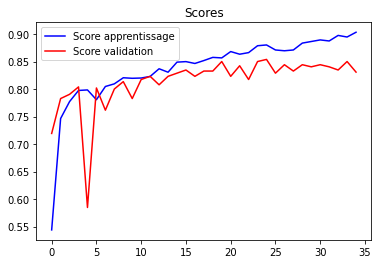

In [26]:
plot_scores(train)

In [27]:
Algorithm.append('Convolutional neural network')
Accuracy.append(scores[1] * 100)

print(Algorithm[-1] +  ': ', Accuracy[-1])

Convolutional neural network:  83.07692408561707


In [28]:
# Prediction
y_cnn = np.argmax(model.predict(X_test),axis=1)

21/21 [==============================] - 19s 884ms/step


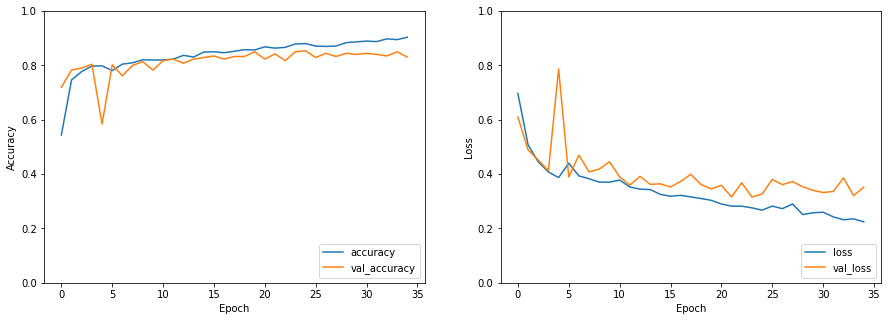

In [29]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'], label='accuracy')
plt.plot(train.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(train.history['loss'], label='loss')
plt.plot(train.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

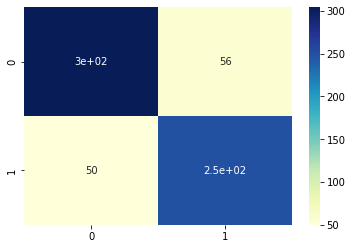

In [30]:
cm = confusion_matrix(y_test, y_cnn)
sns.heatmap(cm,annot = True, cmap="YlGnBu")

In [31]:
print(classification_report(y_test, y_cnn, target_names = ['Benign (Class 0)','Malignant(Class 1)']))

                    precision    recall  f1-score   support

  Benign (Class 0)       0.86      0.84      0.85       360
Malignant(Class 1)       0.82      0.83      0.83       300

          accuracy                           0.84       660
         macro avg       0.84      0.84      0.84       660
      weighted avg       0.84      0.84      0.84       660



number d'images  classes:--> 106



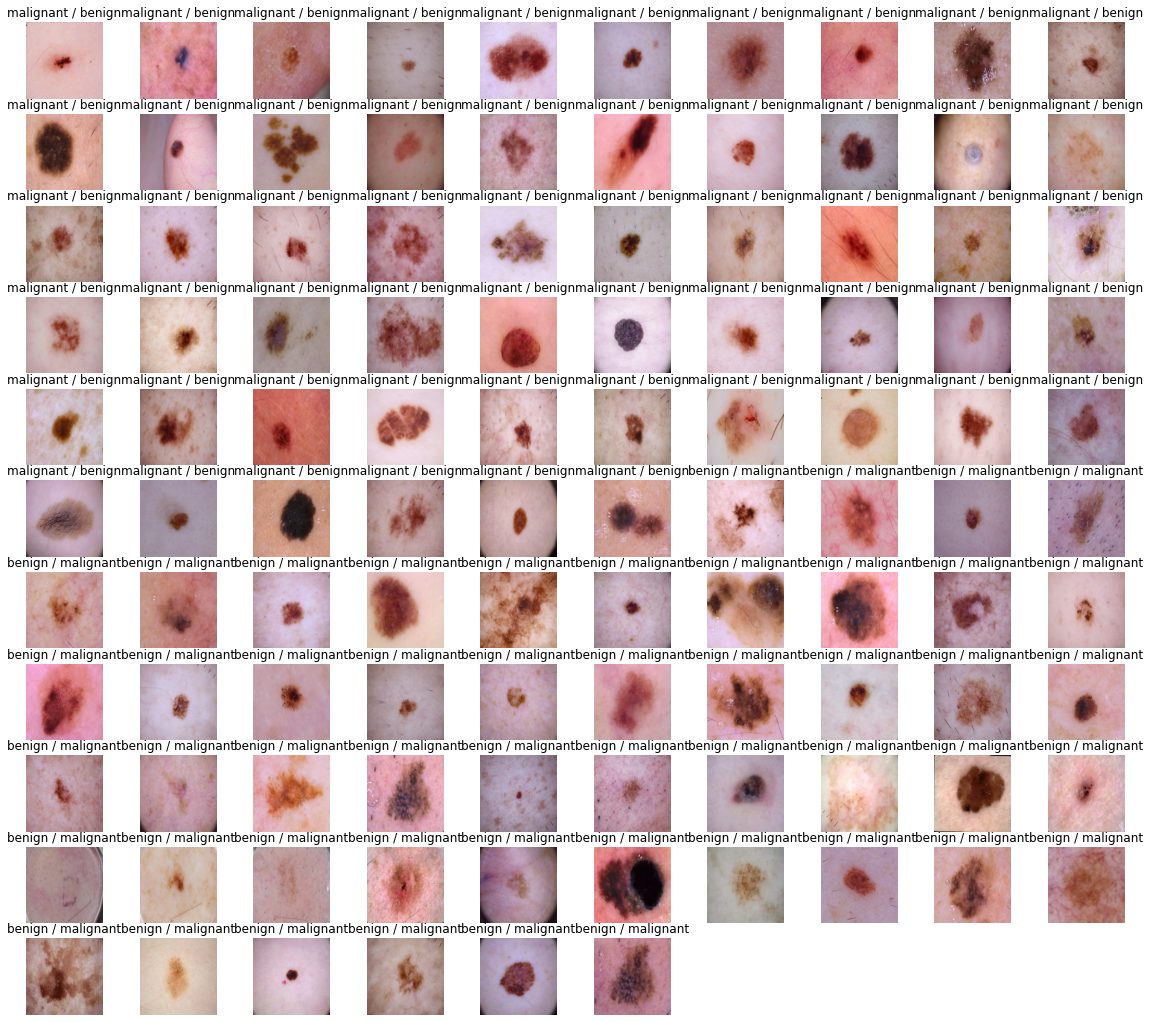

In [32]:
plt.figure(figsize=(20,25))
n_test = X_test.shape[0]
i= 1 
for j in range(0,len(X_test)):
    if (y_cnn[j] != y_test[j]) & (i<150) :
        plt.subplot(15,10,i)
        plt.axis('off')
        plt.imshow(X_test[j])
        plt.title('%s / %s' % (Classes[y_cnn[j]], Classes[y_test[j]]))
        i+=1
print(f"number d'images  classes:--> {i-1}\n")

In [33]:
from tensorflow.keras.applications import VGG16

In [34]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(244,244,3))
vgg16.trainable = False

58889256/58889256 [==============================] - 1s 0us/step


In [35]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 244, 244, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 244, 244, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 122, 122, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 122, 122, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 122, 122, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 61, 61, 128)       0     

In [36]:
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(Number_classes, activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

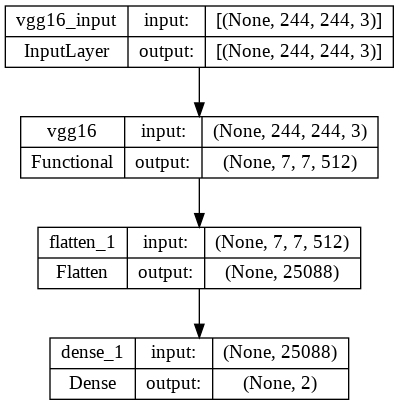

In [37]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True,
    show_layer_names=True,
)

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_1 (Dense)             (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
train = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=35, verbose=1)
# Test
scores = model.evaluate(X_val, y_val, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Epoch 1/35
11/65 [====>.........................] - ETA: 17:41 - loss: 0.8989 - accuracy: 0.5682

In [ ]:
score = model.evaluate(test_generator, verbose=1, steps=5)

Algorithm.append('VGG16')
Accuracy.append(score[1] * 100)

print(Algorithm[-1] +  ': ', Accuracy[-1])

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'], label='accuracy')
plt.plot(train.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(train.history['loss'], label='loss')
plt.plot(train.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [ ]:
# Prediction
y_cnn = np.argmax(model.predict(X_test),axis=1)

In [ ]:
cm = confusion_matrix(y_test, y_cnn)
sns.heatmap(cm,annot = True, cmap="YlGnBu")

In [ ]:
print(classification_report(y_test, y_cnn, target_names = ['Benign (Class 0)','Malignant(Class 1)']))

In [ ]:
plt.figure(figsize=(20,25))
n_test = X_test.shape[0]
i = 1

for j in range(0,len(X_test)):
    if (y_cnn[j] != y_test[j]) & (i<150) :
        plt.subplot(15,10,i)
        plt.axis('off')
        plt.imshow(X_test[j])
        plt.title('%s / %s' % (Classes[y_cnn[j]], Classes[y_test[j]]))
        i+=1
y_cnn_misclassified = i - 1
print(f"nombre d'images mal classées:--> {y_cnn_misclassified}\n")

In [ ]:
for i in range (len(vgg16.layers)):
    print (i,vgg16.layers[i])

In [ ]:
for layer in vgg16.layers[0:5]:
    layer.trainable=False
for layer in vgg16.layers[5:10]:
    layer.trainable=True
for layer in vgg16.layers[10:15]:
    layer.trainable=False
for layer in vgg16.layers[15:]:
    layer.trainable=True

In [ ]:
model = Sequential()
model.add(vgg16)
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(Number_classes, activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

In [ ]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True,
    show_layer_names=True,
)

In [ ]:
train = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, verbose=1)
# Test
scores = model.evaluate(X_val, y_val, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

In [ ]:
Algorithm.append('VGG16 with drop out(0.3)')
Accuracy.append(scores[1] * 100)

print(Algorithm[-1] +  ': ', Accuracy[-1])

In [ ]:
plot_scores(train)

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'], label='accuracy')
plt.plot(train.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(train.history['loss'], label='loss')
plt.plot(train.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')


In [ ]:
# Prediction
y_cnn = np.argmax(model.predict(X_test),axis=1)

In [ ]:
cm = confusion_matrix(y_test, y_cnn)
sns.heatmap(cm,annot = True, cmap="YlGnBu")

In [ ]:
print(classification_report(y_test, y_cnn, target_names = ['Benign (Class 0)','Malignant(Class 1)']))

In [ ]:
plt.figure(figsize=(30,25))
n_test = X_test.shape[0]
i = 1

for j in range(0,len(X_test)):
    if (y_cnn[j] != y_test[j]) & (i<100) :
        plt.subplot(10,10,i)
        plt.axis('off')
        plt.imshow(X_test[j])
        plt.title('%s / %s' % (Classes[y_cnn[j]], Classes[y_test[j]]))
        i+=1
y_cnn_misclassified = i - 1
print(f"number d'images  classes:--> {y_cnn_misclassified}\n")

In [ ]:
from tensorflow.keras.applications import ResNet50V2

In [ ]:
ResNet50V2 = ResNet50V2(weights='imagenet', include_top=False, input_shape=(244,244,3))
ResNet50V2.trainable = False

In [ ]:
ResNet50V2.summary()

In [ ]:
for i in range (len(ResNet50V2.layers)):
    print (i,ResNet50V2.layers[i])

In [ ]:
for layer in ResNet50V2.layers[:180]:
    layer.trainable=False
for layer in ResNet50V2.layers[180:]:
    layer.trainable=True

In [ ]:
model = Sequential()
model.add(ResNet50V2)
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(Number_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True,
    show_layer_names=True,
)

In [ ]:
train = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, verbose=1)
# Test
scores = model.evaluate(X_val, y_val, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

In [ ]:
plot_scores(train)

In [ ]:
Algorithm.append('ResNet50')
Accuracy.append(scores[1] * 100)

print(Algorithm[-1] +  ': ', Accuracy[-1])

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'], label='accuracy')
plt.plot(train.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(train.history['loss'], label='loss')
plt.plot(train.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')


In [ ]:
# Prediction
y_cnn = np.argmax(model.predict(X_test),axis=1)

In [ ]:
cm = confusion_matrix(y_test, y_cnn)
sns.heatmap(cm, annot = True, cmap="YlGnBu")

In [ ]:
print(classification_report(y_test, y_cnn, target_names = ['Benign (Class 0)','Malignant(Class 1)']))

In [ ]:
plt.figure(figsize=(20,25))
n_test = X_test.shape[0]
i = 1

for j in range(0,len(X_test)):
    if (y_cnn[j] != y_test[j]) & (i<150) :
        plt.subplot(15,10,i)
        plt.axis('off')
        plt.imshow(X_test[j])
        plt.title('%s / %s' % (Classes[y_cnn[j]], Classes[y_test[j]]))
        i+=1
y_cnn_misclassified = i - 1
print(f"number d'images mal classes:--> {y_cnn_misclassified}\n")

In [ ]:
pd.DataFrame(list(zip(Algorithm, Accuracy)), columns = ['Algorithm', 'Accuracy'])